# Applying Advanced Transformations (Core)
- Scotty Thomason

## The Task
Your task is two-fold:

I. Clean the files and combine them into one final DataFrame.

This dataframe should have the following columns:
Hero (Just the name of the Hero)
Publisher
Gender
Eye color
Race
Hair color
Height (numeric)
Skin color
Alignment
Weight (numeric)
Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
Agility
Flight
Superspeed
etc.
Hint: There is a space in "100 kg" or "52.5 cm"



II. Use your combined DataFrame to answer the following questions.

Compare the average weight of super powers who have Super Speed to those who do not.
What is the average height of heroes for each publisher?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
## Importing the OS and JSON Modules
import os,json

In [2]:
df_info = pd.read_csv('Data/superhero_info - superhero_info.csv')
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [4]:
df_info.duplicated().sum()

0

In [5]:
df_info['Hero|Publisher'].str.split("|",expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [6]:
## save the 2 new columns into the dataframe
df_info[['Hero','Publisher']] = df_info['Hero|Publisher'].str.split("|",expand=True)
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [7]:
## drop the original column 
df_info = df_info.drop(columns=['Hero|Publisher'])
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [8]:
col = df_info.pop("Hero")
df_info.insert(0, col.name, col)

col = df_info.pop("Publisher")
df_info.insert(1, col.name, col)

df_info.head()

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [9]:
## examining a single value from the coordinates col
measure = df_info.loc[0,"Measurements"]
print(type(measure))

measure

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [10]:
## use .str.replace to replace all single quotes
df_info['Measurements'] = df_info['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
df_info['Measurements'] = df_info['Measurements'].apply(json.loads)
df_info['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [11]:
## check a single value after transformation
test_measure = df_info.loc[0, 'Measurements']
print(type(test_measure))
test_measure

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [12]:
height_weight = df_info['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [13]:
df_info = pd.concat((df_info, height_weight), axis =1)
df_info.head()

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Height,Weight
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0 cm,441.0 kg
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",191.0 cm,65.0 kg
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",185.0 cm,90.0 kg
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0 cm,441.0 kg
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",193.0 cm,122.0 kg


In [14]:
df_info.drop(columns=['Measurements'])

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0 cm,65.0 kg
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,185.0 cm,90.0 kg
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0 cm,441.0 kg
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,193.0 cm,122.0 kg
...,...,...,...,...,...,...,...,...,...,...
458,Yellowjacket,Marvel Comics,Male,Human,good,Blond,blue,Unknown,183.0 cm,83.0 kg
459,Yellowjacket II,Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,165.0 cm,52.0 kg
460,Yoda,George Lucas,Male,Yoda's species,good,White,brown,green,66.0 cm,17.0 kg
461,Zatanna,DC Comics,Female,Human,good,Black,blue,Unknown,170.0 cm,57.0 kg


In [15]:
# Changing these to floats
df_info['Height'] = df_info['Height'].str.replace('cm', '')

df_info['Weight'] = df_info['Weight'].str.replace('kg', '')

In [16]:
df_info['Height'] = df_info['Height'].astype(float)

df_info['Weight'] = df_info['Weight'].astype(float)

In [17]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hero          463 non-null    object 
 1   Publisher     463 non-null    object 
 2   Gender        463 non-null    object 
 3   Race          463 non-null    object 
 4   Alignment     463 non-null    object 
 5   Hair color    463 non-null    object 
 6   Eye color     463 non-null    object 
 7   Skin color    463 non-null    object 
 8   Measurements  463 non-null    object 
 9   Height        463 non-null    float64
 10  Weight        463 non-null    float64
dtypes: float64(2), object(9)
memory usage: 39.9+ KB


In [18]:
df_powers = pd.read_csv('Data/superhero_powers - superhero_powers.csv')
df_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [19]:
df_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [20]:
df_powers.rename(columns={'hero_names': 'Hero'}, inplace=True)
df_powers.head()

,Hero,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [21]:
df_powers['Powers-Split'] = df_powers['Powers'].str.split(',')

In [22]:
## showing the lists are really strings
df_powers.loc[2,'Powers-Split']

['Agility',
 'Accelerated Healing',
 'Cold Resistance',
 'Durability',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Telepathy',
 'Stamina',
 'Immortality',
 'Reflexes',
 'Enhanced Sight',
 'Sub-Mariner']

In [23]:
## exploding the column of lists
exploded = df_powers.explode('Powers-Split')
exploded[['Hero','Powers','Powers-Split']].head(5)

,Hero,Powers,Powers-Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [24]:
## saving the unique values from the exploded column
cols_to_make = exploded['Powers-Split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [33]:
for col in cols_to_make:
    df_powers[col] = df_powers['Powers'].str.contains(col)
df_powers.head()

KeyError: 'Powers'

In [26]:
# drop Powers
df_powers = df_powers.drop(columns=['Powers','Powers-Split'])
df_powers.head()

,Hero,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
## Merging with the same column name
EDA_df=pd.merge(df_info,df_powers, on='Hero')

In [28]:
EDA_df.head()

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Height,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",191.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",185.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",193.0,...,False,False,False,False,False,False,False,False,False,False


In [29]:
## save data for next lesson
# EDA_df.to_csv('Data/advanced_tf_data_pt1.csv', index=False)

# II. Use your combined DataFrame to answer the following questions.

1. Compare the average weight of super heros who have Super Speed to those who do not.



In [30]:
# result1 = EDA_df.groupby('Weight')['Super Speed'].mean()
# print(result1)

<AxesSubplot:xlabel='Super Speed', ylabel='Weight'>

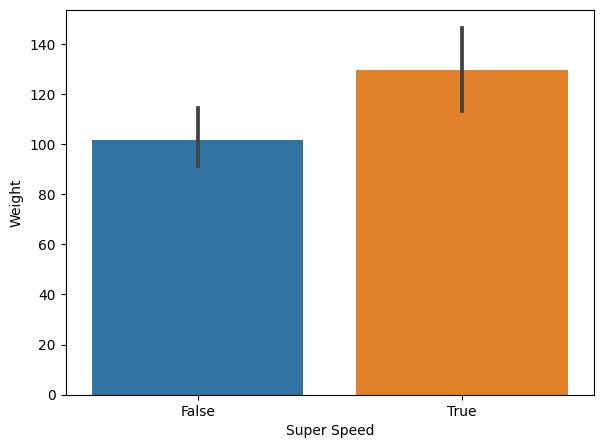

In [31]:
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
sns.barplot(x='Super Speed',y='Weight',data=EDA_df)

2. What is the average height of heroes for each publisher?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Marvel Comics'),
  Text(1, 0, 'Dark Horse Comics'),
  Text(2, 0, 'DC Comics'),
  Text(3, 0, 'Team Epic TV'),
  Text(4, 0, 'George Lucas'),
  Text(5, 0, 'Shueisha'),
  Text(6, 0, 'Star Trek'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Image Comics')])

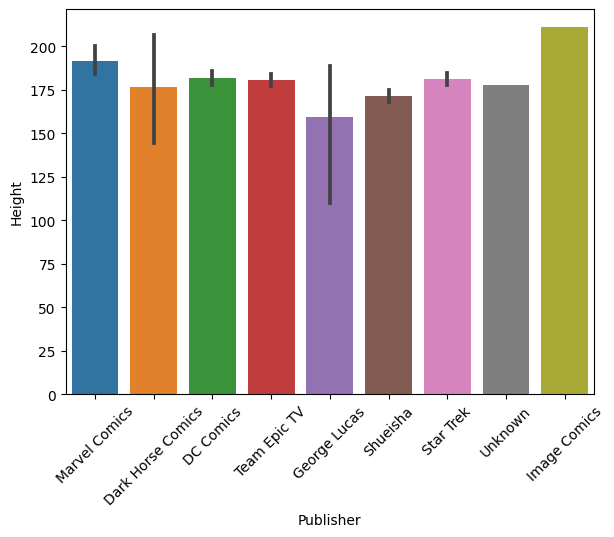

In [32]:
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
sns.barplot(x='Publisher',y='Height',data=EDA_df)
plt.xticks(rotation=45)